# Analisis de cryptocompare y el VES

Llamado de librerias necesarias

In [1]:
import urllib
import shutil

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import random as rn

from matplotlib.ticker import PercentFormatter

Lectura del archivo descargado de la pagina https://www.cryptocompare.com/coins/btc/charts/USD?p=ALL

In [2]:
#Datos cuando la moneda era en Dolares

file_usd = "day_CryptoCompare_Index_BTC_USD_3261_11561039639051.csv"

df_usd = pd.read_csv(file_usd)

Lectura del archivo (legado) descargado de la pagina https://www.cryptocompare.com/coins/btc/charts/VEF?p=ALL

In [3]:
#Datos cuando la moneda era en Bolivares Fuerte

file_old = "day_CryptoCompare_Index_BTC_VEF_2076_11560463364419.csv"

df_old = pd.read_csv(file_old)

Lectura del archivo descargado de la pagina https://www.cryptocompare.com/coins/btc/charts/VES?p=ALL

In [4]:
#Datos cuando la moneda era en Bolivares Soberanos

file_new = "day_CryptoCompare_Index_BTC_VES_300_11561034576120.csv"

df_new = pd.read_csv(file_new)

Reconversión monetaria

In [5]:
df_old['close'] = df_old['close'].div(100000)
df_old['high'] = df_old['high'].div(100000)
df_old['low'] = df_old['low'].div(100000)
df_old['open'] = df_old['open'].div(100000)

In [6]:
df_old.loc[1770:1790]

,time,timeDate,close,high,low,open,volumefrom,volumeto,volume
1770,1534032000000,2018-08-11,316977.304425,2.147029e+06,210470.928703,407673.321514,36.1700,1.211430e+12,NaN
1771,1534118400000,2018-08-12,334021.023676,2.147400e+06,250000.000000,320230.053270,70.9500,2.446304e+12,NaN
1772,1534204800000,2018-08-13,340200.000000,5.000000e+05,272009.990625,328499.973309,77.8500,2.667306e+12,NaN
1773,1534291200000,2018-08-14,399500.125468,4.400500e+05,281083.920926,352999.992499,98.2200,3.849870e+12,NaN
1774,1534377600000,2018-08-15,410499.931447,2.147400e+06,4.500000,395200.058173,32.9600,1.340531e+12,NaN
1775,1534464000000,2018-08-16,450089.953692,4.990020e+05,355000.177500,426429.337474,5.3610,2.354143e+11,NaN
1776,1534550400000,2018-08-17,516011.847632,2.147389e+06,5.010004,429500.000000,37.1100,2.051794e+12,NaN
1777,1534636800000,2018-08-18,737000.445980,2.000000e+06,324033.569878,512999.924589,15.2600,9.921201e+11,NaN
1778,1534723200000,2018-08-19,4.906771,9.988014e+05,3.500000,575254.470207,17.8300,2.324361e+11,NaN
1779,1534809600000,2018-08-20,6.349996,6.410000e+05,1.567087,6.539795,37.2700,3.679231e+10,NaN


In [7]:
df_new.head()

,time,timeDate,close,high,low,open,volumefrom,volumeto,volume
0,1535155200000,2018-08-24,589998.35,589998.35,589998.35,589998.35,38.28,26538230.63,NaN
1,1535241600000,2018-08-25,665005.04,732000.12,576998.80,589998.35,31.54,21397127.95,NaN
2,1535328000000,2018-08-26,600080.01,710000.00,428008.90,680000.02,45.43,31015886.90,NaN
3,1535414400000,2018-08-27,670000.00,704999.96,607998.83,631009.98,12.70,8665352.00,NaN
4,1535500800000,2018-08-28,650899.42,714966.63,450000.00,664999.99,74.32,53618301.21,NaN


In [8]:
df = df_old.loc[:1782].append(df_new) #Consolidado en Bolivares Soberanos
df.index = range(len(df.index))
df

,time,timeDate,close,high,low,open,volumefrom,volumeto,volume
0,1381104000000,2013-10-06,6.149000e-02,6.149000e-02,6.149000e-02,6.149000e-02,0.03250,199.84,NaN
1,1381190400000,2013-10-07,6.149000e-02,6.149000e-02,6.149000e-02,6.149000e-02,0.00000,0.00,NaN
2,1381276800000,2013-10-08,6.149000e-02,6.149000e-02,6.149000e-02,6.149000e-02,0.00000,0.00,NaN
3,1381363200000,2013-10-09,6.149000e-02,6.149000e-02,6.149000e-02,6.149000e-02,0.00000,0.00,NaN
4,1381449600000,2013-10-10,6.149000e-02,6.149000e-02,6.149000e-02,6.149000e-02,0.00000,0.00,NaN
5,1381536000000,2013-10-11,6.149000e-02,6.149000e-02,6.149000e-02,6.149000e-02,0.00000,0.00,NaN
6,1381622400000,2013-10-12,6.149000e-02,6.149000e-02,6.149000e-02,6.149000e-02,0.00000,0.00,NaN
7,1381708800000,2013-10-13,6.149000e-02,6.149000e-02,6.149000e-02,6.149000e-02,0.00000,0.00,NaN
8,1381795200000,2013-10-14,6.149000e-02,6.149000e-02,6.149000e-02,6.149000e-02,0.00000,0.00,NaN
9,1381881600000,2013-10-15,6.149000e-02,6.149000e-02,6.149000e-02,6.149000e-02,0.00000,0.00,NaN


In [9]:
df2 = df_usd.loc[1178:] #Datos en USD dentro del periodo de tiempo
df2.index = range(len(df2.index))
df2

,time,timeDate,close,high,low,open,volumefrom,volumeto,volume
0,1381104000000,2013-10-06,135.80,139.00,135.12,137.80,7362.35,1.006278e+06,NaN
1,1381190400000,2013-10-07,136.49,137.78,135.65,135.80,5227.21,7.074712e+05,NaN
2,1381276800000,2013-10-08,139.50,142.10,135.80,136.49,17494.19,2.431349e+06,NaN
3,1381363200000,2013-10-09,140.41,141.69,138.51,139.50,11075.87,1.551393e+06,NaN
4,1381449600000,2013-10-10,140.10,141.85,138.87,140.41,7250.91,1.013106e+06,NaN
5,1381536000000,2013-10-11,142.89,143.05,139.39,140.10,11024.42,1.559473e+06,NaN
6,1381622400000,2013-10-12,147.53,147.65,141.50,142.89,16167.47,2.342049e+06,NaN
7,1381708800000,2013-10-13,151.37,153.69,146.03,147.53,29993.56,4.512824e+06,NaN
8,1381795200000,2013-10-14,158.09,158.10,150.62,151.37,15730.10,2.416465e+06,NaN
9,1381881600000,2013-10-15,152.82,162.99,144.20,158.09,42783.96,6.636229e+06,NaN


Determinacion de la tasa de cambio Dolar-Bitcoin

In [10]:
df3 = df2.copy()
df3['close'] = df['close'] / df2['close']
df3['high'] = df['high'] / df2['close']
df3['low'] = df['low'] / df2['close']
df3['open'] = df['open'] / df2['close']
df3['volumefrom'] = df['volumefrom'] * df2['close']
df4 = df3.drop(columns=['time','volumeto', 'volume'])
df5 = df4.drop(df4.index[1770:1782]) #Eliminando columnas con inconsistencias por la reconversion
df5.index = range(len(df5.index))
df5

,timeDate,close,high,low,open,volumefrom
0,2013-10-06,0.000453,0.000453,0.000453,0.000453,4.413500
1,2013-10-07,0.000451,0.000451,0.000451,0.000451,0.000000
2,2013-10-08,0.000441,0.000441,0.000441,0.000441,0.000000
3,2013-10-09,0.000438,0.000438,0.000438,0.000438,0.000000
4,2013-10-10,0.000439,0.000439,0.000439,0.000439,0.000000
5,2013-10-11,0.000430,0.000430,0.000430,0.000430,0.000000
6,2013-10-12,0.000417,0.000417,0.000417,0.000417,0.000000
7,2013-10-13,0.000406,0.000406,0.000406,0.000406,0.000000
8,2013-10-14,0.000389,0.000389,0.000389,0.000389,0.000000
9,2013-10-15,0.000402,0.000402,0.000402,0.000402,0.000000


Reacondicionamiento del Dataframe para realizar calculos posteriores

Función para el cálculo del RSI (Relative strength index)

In [11]:
def rsi(x):
    delta = x.diff()
    window = 15
    up_days = delta.copy()
    up_days[delta<=0]=0.0
    down_days = abs(delta.copy())
    down_days[delta>0]=0.0
    RS_up = up_days.rolling(window).mean()
    RS_down = down_days.rolling(window).mean()
    rsi= 100-100/(1+RS_up/RS_down)
    return rsi

In [12]:
df6 = df5.copy()
df6['timeDate'] = pd.to_datetime(df6['timeDate'])
df6.columns = ['Date', 'Close', 'High', 'Low', 'Open','Volumen']
df6 = df6[['Date', 'Open', 'High', 'Low','Close','Volumen']]
df6 = df6.set_index('Date')
df6['RSI'] = rsi(df6['Close'])
df6

,Open,High,Low,Close,Volumen,RSI
Date,,,,,,
2013-10-06,0.000453,0.000453,0.000453,0.000453,4.413500,NaN
2013-10-07,0.000451,0.000451,0.000451,0.000451,0.000000,NaN
2013-10-08,0.000441,0.000441,0.000441,0.000441,0.000000,NaN
2013-10-09,0.000438,0.000438,0.000438,0.000438,0.000000,NaN
2013-10-10,0.000439,0.000439,0.000439,0.000439,0.000000,NaN
2013-10-11,0.000430,0.000430,0.000430,0.000430,0.000000,NaN
2013-10-12,0.000417,0.000417,0.000417,0.000417,0.000000,NaN
2013-10-13,0.000406,0.000406,0.000406,0.000406,0.000000,NaN
2013-10-14,0.000389,0.000389,0.000389,0.000389,0.000000,NaN


Analisis de los datos

Fuente: https://ntguardian.wordpress.com/2018/07/17/stock-data-analysis-python-v2/

Funcion para definir las velas

In [13]:
from matplotlib.dates import DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY
from mpl_finance import candlestick_ohlc
 
def pandas_candlestick_ohlc(dat, stick = "day", adj = False, otherseries = None):
    """
    :param dat: pandas DataFrame object with datetime64 index, and float columns "Open", "High", "Low", and "Close", likely created via DataReader from "yahoo"
    :param stick: A string or number indicating the period of time covered by a single candlestick. Valid string inputs include "day", "week", "month", and "year", ("day" default), and any numeric input indicates the number of trading days included in a period
    :param adj: A boolean indicating whether to use adjusted prices
    :param otherseries: An iterable that will be coerced into a list, containing the columns of dat that hold other series to be plotted as lines
 
    This will show a Japanese candlestick plot for stock data stored in dat, also plotting other series if passed.
    """
    mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
    alldays = DayLocator()              # minor ticks on the days
    dayFormatter = DateFormatter('%d')      # e.g., 12
 
    # Create a new DataFrame which includes OHLC data for each period specified by stick input
    fields = ["Open", "High", "Low", "Close"]
    transdat = dat.loc[:,fields]
    transdat.columns = pd.Index(["Open", "High", "Low", "Close"])
    if (type(stick) == str):
        if stick == "day":
            plotdat = transdat
            stick = 1 # Used for plotting
        elif stick in ["week", "month", "year"]:
            if stick == "week":
                transdat["week"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[1]) # Identify weeks
            elif stick == "month":
                transdat["month"] = pd.to_datetime(transdat.index).map(lambda x: x.month) # Identify months
            transdat["year"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[0]) # Identify years
            grouped = transdat.groupby(list(set(["year",stick]))) # Group by year and other appropriate variable
            plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
            for name, group in grouped:
                plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                            "High": max(group.High),
                                            "Low": min(group.Low),
                                            "Close": group.iloc[-1,3]},
                                           index = [group.index[0]]))
            if stick == "week": stick = 5
            elif stick == "month": stick = 30
            elif stick == "year": stick = 365
 
    elif (type(stick) == int and stick >= 1):
        transdat["stick"] = [np.floor(i / stick) for i in range(len(transdat.index))]
        grouped = transdat.groupby("stick")
        plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
        for name, group in grouped:
            plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                        "High": max(group.High),
                                        "Low": min(group.Low),
                                        "Close": group.iloc[-1,3]},
                                       index = [group.index[0]]))
 
    else:
        raise ValueError('Valid inputs to argument "stick" include the strings "day", "week", "month", "year", or a positive integer')
 
 
    # Set plot parameters, including the axis object ax used for plotting
    fig, ax = plt.subplots()
    fig.subplots_adjust(bottom=0.2)
    if plotdat.index[-1] - plotdat.index[0] < pd.Timedelta('730 days'):
        weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
        ax.xaxis.set_major_locator(mondays)
        ax.xaxis.set_minor_locator(alldays)
    else:
        weekFormatter = DateFormatter('%b %d, %Y')
    ax.xaxis.set_major_formatter(weekFormatter)
 
    ax.grid(True)
 
    # Create the candelstick chart
    candlestick_ohlc(ax, list(zip(list(date2num(plotdat.index.tolist())), plotdat["Open"].tolist(), plotdat["High"].tolist(),
                      plotdat["Low"].tolist(), plotdat["Close"].tolist())),
                      colorup = "black", colordown = "red", width = stick * .4)
 
    # Plot other series (such as moving averages) as lines
    if otherseries != None:
        if type(otherseries) != list:
            otherseries = [otherseries]
        dat.loc[:,otherseries].plot(ax = ax, lw = 1.3, grid = True)
 
    ax.xaxis_date()
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
 
    plt.show()

In [14]:
# Codigo requerido para que los graficos aparezcan
%matplotlib inline

# Control de las dimensiones de las gráficas
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 5)   # Tamaño estandar de las gráficas

Populating the interactive namespace from numpy and matplotlib


In [15]:
n = 180 #Periodo a estudiar

df7 = pd.DataFrame({"Dolar-Bitcoin": df6['Close'].tail(n).copy(),"RSI": df6['RSI'].tail(n).copy(),
                    "Volumen": df6['Volumen'].tail(n).copy()})
df7.tail()

,Dolar-Bitcoin,RSI,Volumen
Date,,,
2019-06-15,6999.525114,63.784506,1874.852784
2019-06-16,6673.086684,56.595677,1504.964812
2019-06-17,6992.580388,57.131427,2414.826689
2019-06-18,7122.709586,70.157029,1909.935132
2019-06-19,7039.244838,66.955382,427.144308


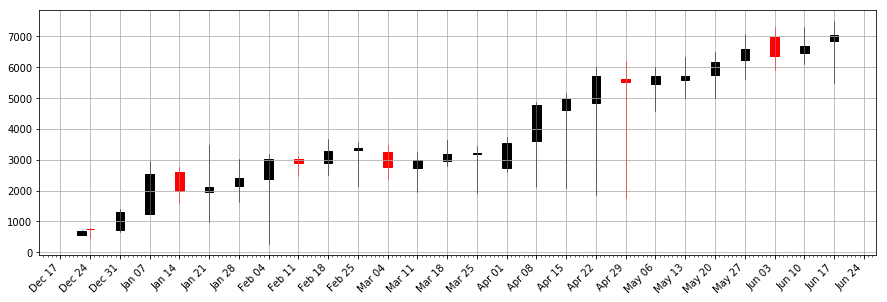

In [16]:
pandas_candlestick_ohlc(df6.tail(n), adj=True, stick="week")

In [17]:
#df7.plot(subplots=True,grid = True, figsize=(15, 15)) # Grafico del precio de cierre del Dolar-Bitcoin

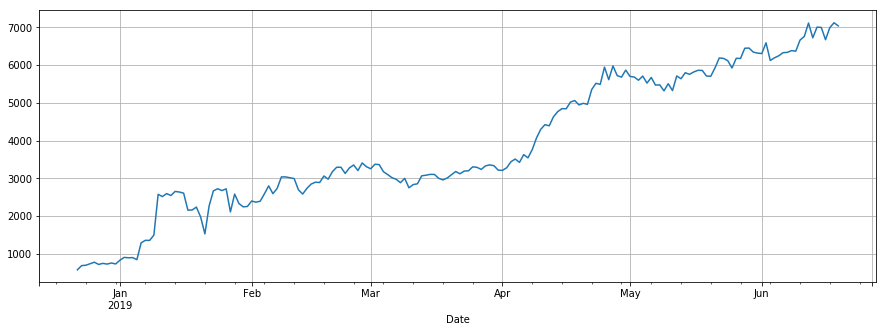

In [18]:
df7["Dolar-Bitcoin"].plot(grid = True) # Grafico del precio de cierre del Dolar-Bitcoin

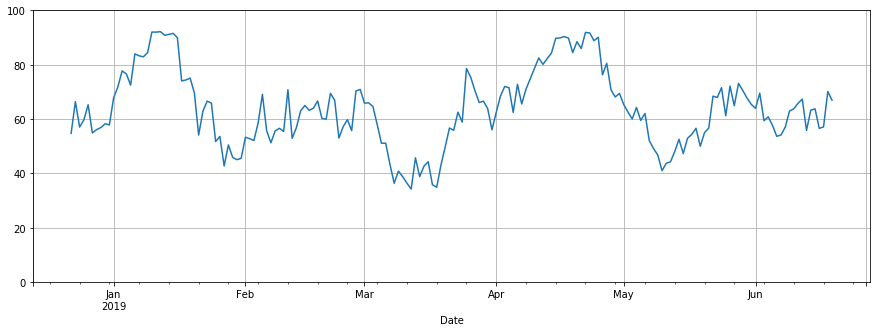

In [19]:
df7["RSI"].plot(grid = True, ylim = (0,100) ) # Grafico del RSI del Dolar-Bitcoin

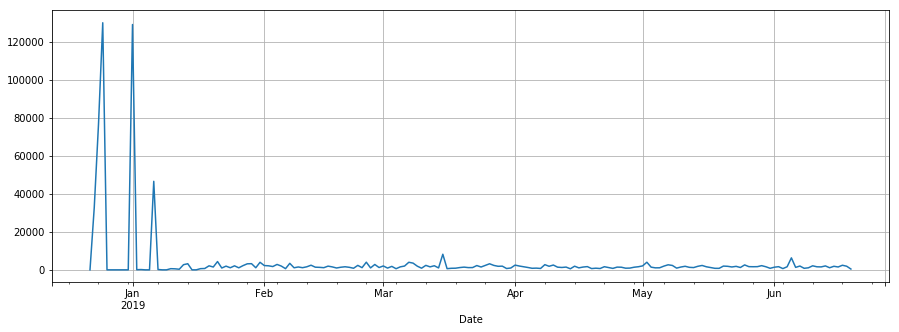

In [20]:
df7["Volumen"].plot(grid = True) # Grafico del Volumen en USD del Dolar-Bitcoin

In [21]:
df7_return = df7[["Dolar-Bitcoin"]].apply(lambda x: x / x[0])
df7_return.head() - 1

,Dolar-Bitcoin
Date,
2018-12-22,0.000000
2018-12-23,0.196527
2018-12-24,0.212939
2018-12-25,0.281846
2018-12-26,0.353106


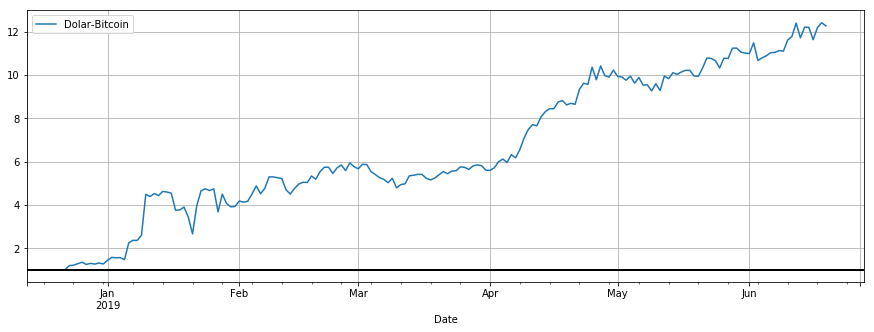

In [22]:
df7_return.plot(grid = True).axhline(y = 1, color = "black", lw = 2)

In [23]:
df7_change = df7[["Dolar-Bitcoin"]].apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.
df7_change.head()

,Dolar-Bitcoin
Date,
2018-12-22,NaN
2018-12-23,0.179423
2018-12-24,0.013623
2018-12-25,0.055255
2018-12-26,0.054101


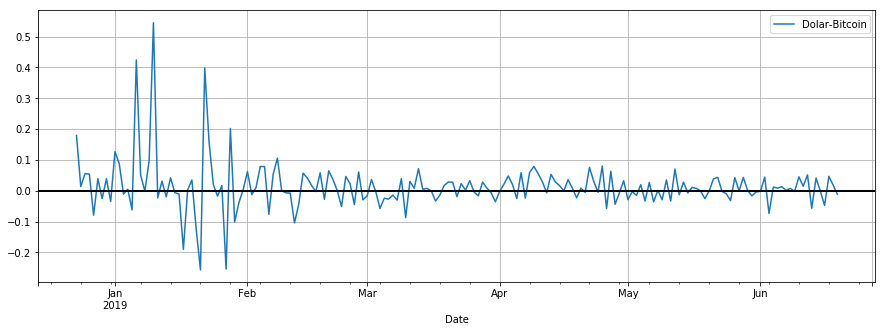

In [24]:
df7_change.plot(grid = True).axhline(y = 0, color = "black", lw = 2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdc9b17fda0>,
      dtype=object)

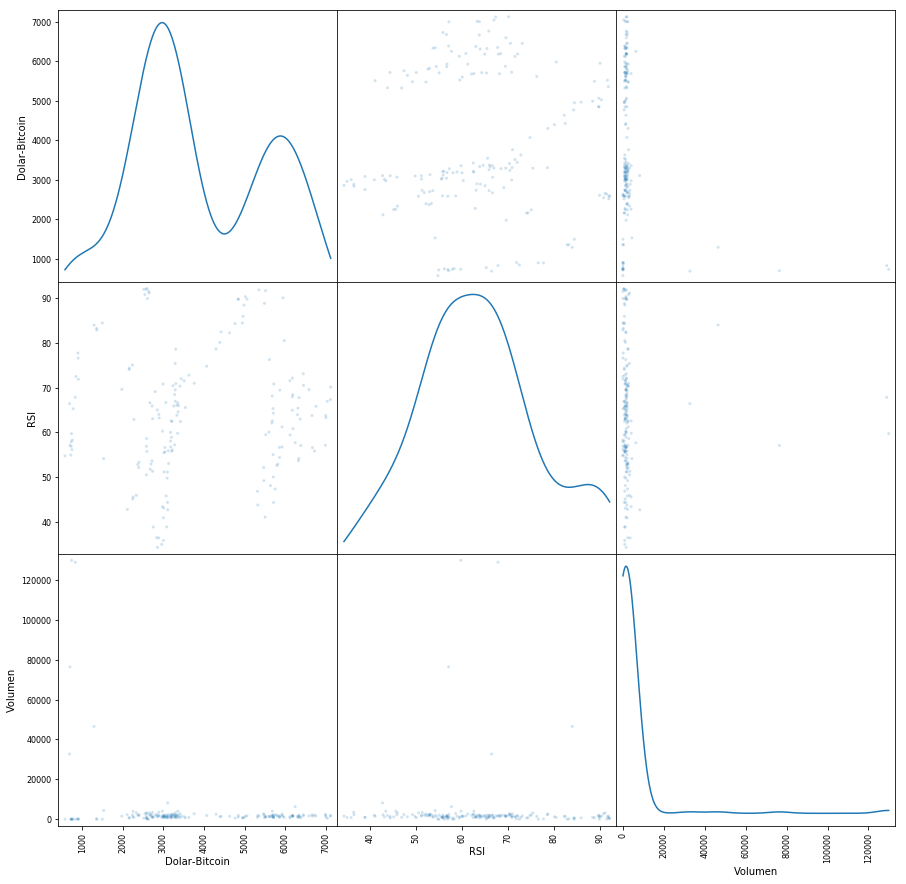

In [25]:
pd.plotting.scatter_matrix(df7, alpha=0.2, figsize=(15, 15), diagonal='kde') #Grafico de dispersion en el Dolar-Bitcoin

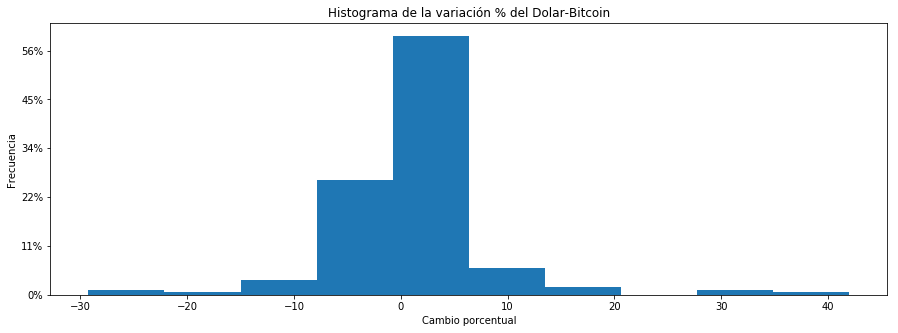

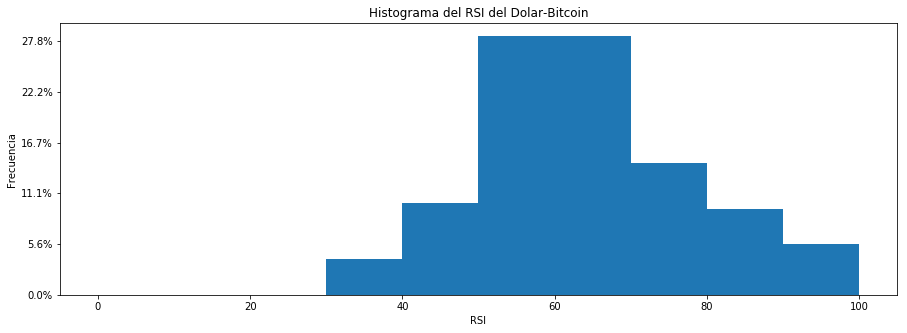

In [27]:
d1 = (df7[["Dolar-Bitcoin"]].diff()/df7[["Dolar-Bitcoin"]]*100).values

fig, bx = plt.subplots()

bx.set(xlabel='Cambio porcentual', ylabel='Frecuencia',
       title='Histograma de la variación % del Dolar-Bitcoin')

bx.yaxis.set_major_formatter(PercentFormatter(bx.hist(d1, bins=10, density=False)[0].sum()))

RSIval = df7[["RSI"]].values

fig, bx = plt.subplots()

bx.set(xlabel='RSI', ylabel='Frecuencia',
       title='Histograma del RSI del Dolar-Bitcoin')

bins = [0,10,20,30,40,50,60,70,80,90,100]

bx.yaxis.set_major_formatter(PercentFormatter(bx.hist(RSIval, bins, density=False)[0].sum()))

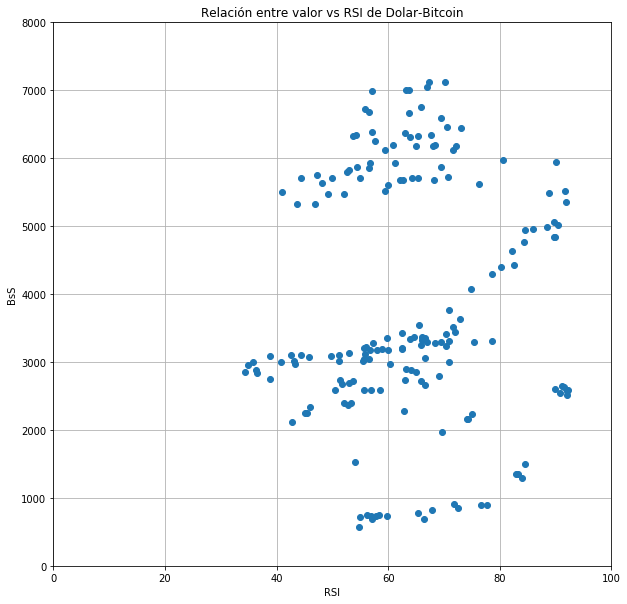

In [28]:
fig, ax = plt.subplots(figsize=(10, 10))

y1 = df7["Dolar-Bitcoin"].values
y2 = df7["RSI"].values

ax.plot(y2, y1, 'o')

ax.set(xlabel='RSI', ylabel='BsS',
       title='Relación entre valor vs RSI de Dolar-Bitcoin')

ytop = np.floor(max(y1)/1000+1)*1000
ybottom = np.floor(min(y1)/1000)*1000

xtop = 100
xbottom = 0

plt.xlim(xbottom, xtop)
plt.ylim(ybottom, ytop)
ax.grid()

Estimación del valor del dolartoday

In [29]:
n_random = 100000
n_veces = 15 # Dias a ser referenciados

if n_veces > n:
    n_veces = n # Siempre menor que los dias ploteados

val1 = np.concatenate(([0], bx.hist(d1, bins=10, density=False)[0].cumsum()), axis=None)
val2 = bx.hist(d1, bins=10, density=False)[1]

x = np.zeros(n_random)
y = np.ones(n_random)
for j in range(n_veces):
    for i in range(n_random):
        val = rn.randrange(0,n-1)
        x[i] = val2[val1>=val][0]
    y = y * (1 + x/100)
    
dolarval = y*df7["Dolar-Bitcoin"].values[-1]

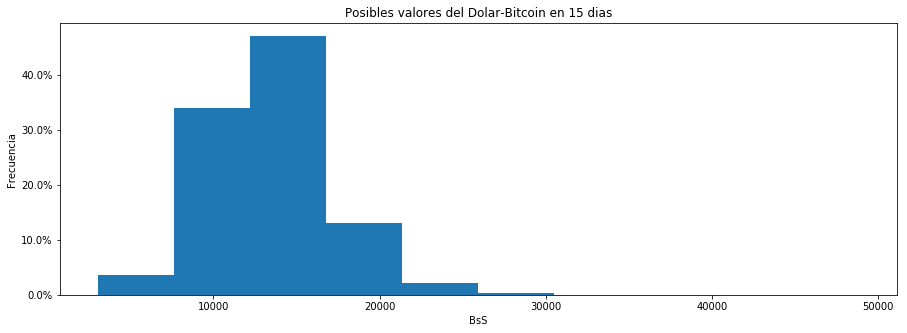

In [30]:
fig, bx = plt.subplots(figsize=(15, 5))

bx.set(xlabel='BsS', ylabel='Frecuencia',
       title='Posibles valores del Dolar-Bitcoin en ' + str(n_veces) + ' dias')

bx.yaxis.set_major_formatter(PercentFormatter(bx.hist(dolarval, bins=10, density=False)[0].sum()))

In [31]:
import scipy.stats as st

alpha = 0.95 # intervalo de confianza

z_value = st.norm.ppf(1-(1-alpha)/2)

FRDT= 1 #Factor entre el valor del dolar en la calle y el indicado por dolartoday

low_int = (dolarval.mean() - z_value * dolarval.std())*FRDT
high_int = (dolarval.mean() + z_value * dolarval.std())*FRDT

print("Con una confianza del " + str(alpha*100) + "% que el valor del Dolar-Bitcoin en " + str(n_veces) + " dias estará entre " + str(low_int.round(2)) 
      + " y " + str(high_int.round(2)))

print("El valor estimado del Dolar-Bitcoin en " + str(n_veces) + " dias es de " + str(dolarval.mean().round(2)))

Con una confianza del 95.0% que el valor del Dolar-Bitcoin en 15 dias estará entre 6345.9 y 20452.49
El valor estimado del Dolar-Bitcoin en 15 dias es de 13399.19


Estimación de la fuerza entre comprar y vender

In [32]:
#Peso del compra-venta * valor del RSI

bins = [0,9,18,27,36,45,54,63,72,81,90,100]

weight = bx.hist(RSIval[-n_veces:], bins, density=False)[0] / bx.hist(RSIval[-n_veces:], bins, density=False)[0].sum()

tier_1 = np.array([0,100])*weight[0]
tier_2 = np.array([10,90])*weight[1]
tier_3 = np.array([20,80])*weight[2]
tier_4 = np.array([30,70])*weight[3]
tier_5 = np.array([40,60])*weight[4]
tier_6 = np.array([50,50])*weight[5]
tier_7 = np.array([60,40])*weight[6]
tier_8 = np.array([70,30])*weight[7]
tier_9 = np.array([80,20])*weight[8]
tier_10 = np.array([90,10])*weight[9]
tier_11 = np.array([100,0])*weight[10]

tier = (tier_1 + tier_2 + tier_3 + tier_4 + tier_5 + tier_6 + tier_7 + tier_8 + tier_9 + tier_10) 

tier = tier / tier.sum() * 100

if tier[0] < 15:
    mensaje = 'Fuerte Comprar'
elif tier[0] < 30:
    mensaje = 'Comprar'
elif tier[0] < 40:
    mensaje = 'Pensar Comprar'
elif tier[0] < 60:
    mensaje = 'Mantener'
elif tier[0] < 70:
    mensaje = 'Pensar Vender'
elif tier[0] < 85:
    mensaje = 'Vender'
else:
    mensaje = 'Fuerte Vender'
    
print('Se recomienda tener la posición de: ' + mensaje)

Se recomienda tener la posición de: Pensar Vender


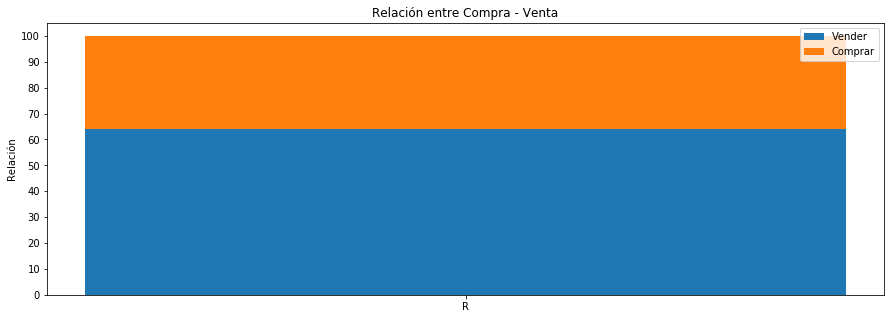

In [33]:
Vender = tier[0]
Comprar = tier[1]
ind = np.arange(1)    # the x locations for the groups

p1 = plt.bar(ind, Vender)
p2 = plt.bar(ind, Comprar, bottom=Vender)

plt.ylabel('Relación')
plt.title('Relación entre Compra - Venta')
plt.xticks(ind, ('Relación'))
plt.yticks(np.arange(0, 101, 10))
plt.legend((p1[0], p2[0]), ('Vender', 'Comprar'))

Media Movil

In [34]:
df8 = df6.copy()
df8.tail()

,Open,High,Low,Close,Volumen,RSI
Date,,,,,,
2019-06-15,6907.867989,7294.632760,6448.342908,6999.525114,1874.852784,63.784506
2019-06-16,6731.997493,7122.954388,6587.377128,6673.086684,1504.964812,56.595677
2019-06-17,6859.942016,7487.516778,6659.854967,6992.580388,2414.826689,57.131427
2019-06-18,6842.768550,7246.345310,5495.232500,7122.709586,1909.935132,70.157029
2019-06-19,7092.408118,7156.620339,6974.083504,7039.244838,427.144308,66.955382


In [35]:
df8["20d"] = np.round(df6["Close"].rolling(window = 20, center = False).mean(), 2)
df8["50d"] = np.round(df6["Close"].rolling(window = 50, center = False).mean(), 2)
df8["200d"] = np.round(df6["Close"].rolling(window = 200, center = False).mean(), 2)
df8['20d-50d'] = df8['20d'] - df8['50d']
df8.tail()

,Open,High,Low,Close,Volumen,RSI,20d,50d,200d,20d-50d
Date,,,,,,,,,,
2019-06-15,6907.867989,7294.632760,6448.342908,6999.525114,1874.852784,63.784506,6494.24,6049.88,3408.47,444.36
2019-06-16,6731.997493,7122.954388,6587.377128,6673.086684,1504.964812,56.595677,6519.08,6063.78,3439.74,455.30
2019-06-17,6859.942016,7487.516778,6659.854967,6992.580388,2414.826689,57.131427,6546.36,6089.22,3472.27,457.14
2019-06-18,6842.768550,7246.345310,5495.232500,7122.709586,1909.935132,70.157029,6579.88,6118.04,3505.62,461.84
2019-06-19,7092.408118,7156.620339,6974.083504,7039.244838,427.144308,66.955382,6614.62,6141.45,3538.42,473.17


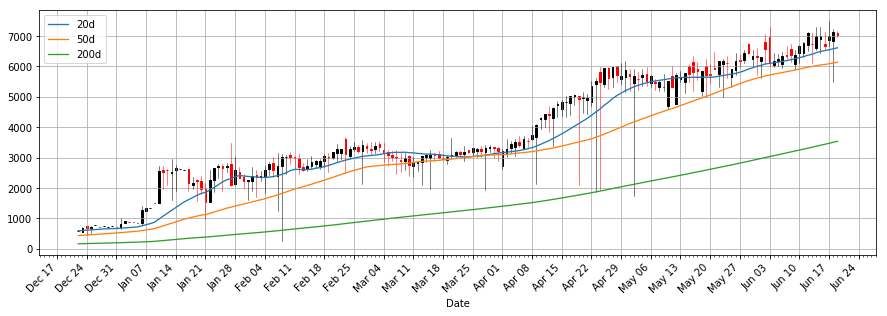

In [36]:
end = datetime.date.today()
start = datetime.date.today()-datetime.timedelta(n)

pandas_candlestick_ohlc(df8.loc[start:end,:], otherseries = ["20d", "50d", "200d"], adj=True)

Estudios de inversion

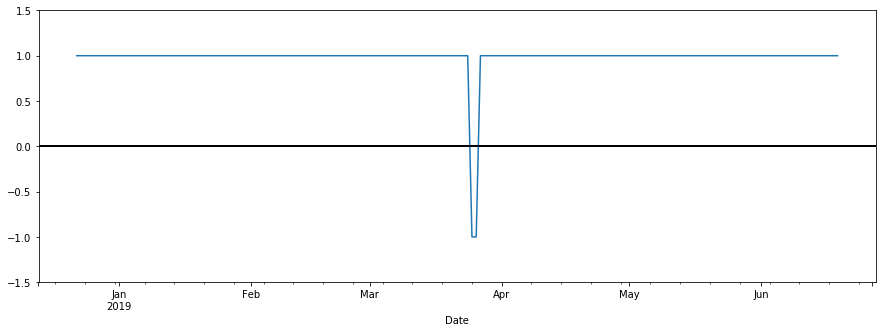

In [37]:
# np.where() is a vectorized if-else function, where a condition is checked for each component of a vector, and the first argument passed is used when the condition holds, and the other passed if it does not
df8["Regime"] = np.where(df8['20d-50d'] > 0, 1, 0)
# We have 1's for bullish regimes and 0's for everything else. Below I replace bearish regimes's values with -1, and to maintain the rest of the vector, the second argument is apple["Regime"]
df8["Regime"] = np.where(df8['20d-50d'] < 0, -1, df8["Regime"])
df8.loc[start:end,"Regime"].plot(ylim = (-1.5,1.5)).axhline(y = 0, color = "black", lw = 2)

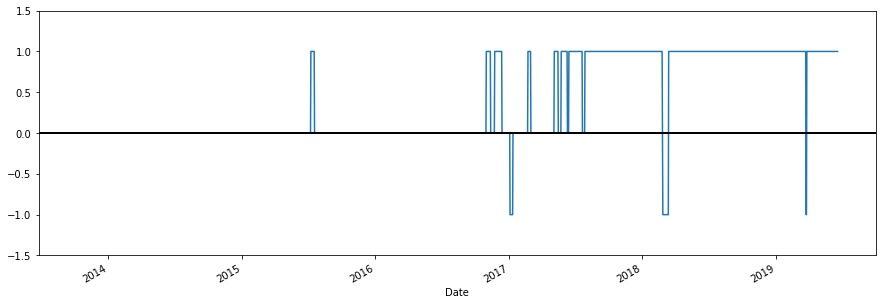

In [38]:
df8["Regime"].plot(ylim = (-1.5,1.5)).axhline(y = 0, color = "black", lw = 2)

In [39]:
df8["Regime"].value_counts()

 0    1269
 1     776
-1      26
Name: Regime, dtype: int64

In [42]:
# To ensure that all trades close out, I temporarily change the regime of the last row to 0
regime_orig = df8.loc[:, "Regime"].iloc[-1]
df8.loc[:, "Regime"].iloc[-1] = 0
df8["Signal"] = np.sign(df8["Regime"] - df8["Regime"].shift(1))
# Restore original regime data
df8.loc[:, "Regime"].iloc[-1] = regime_orig
df8.tail()

,Open,High,Low,Close,Volumen,RSI,20d,50d,200d,20d-50d,Regime,Signal
Date,,,,,,,,,,,,
2019-06-15,6907.867989,7294.632760,6448.342908,6999.525114,1874.852784,63.784506,6494.24,6049.88,3408.47,444.36,1,0.0
2019-06-16,6731.997493,7122.954388,6587.377128,6673.086684,1504.964812,56.595677,6519.08,6063.78,3439.74,455.30,1,0.0
2019-06-17,6859.942016,7487.516778,6659.854967,6992.580388,2414.826689,57.131427,6546.36,6089.22,3472.27,457.14,1,0.0
2019-06-18,6842.768550,7246.345310,5495.232500,7122.709586,1909.935132,70.157029,6579.88,6118.04,3505.62,461.84,1,0.0
2019-06-19,7092.408118,7156.620339,6974.083504,7039.244838,427.144308,66.955382,6614.62,6141.45,3538.42,473.17,1,-1.0


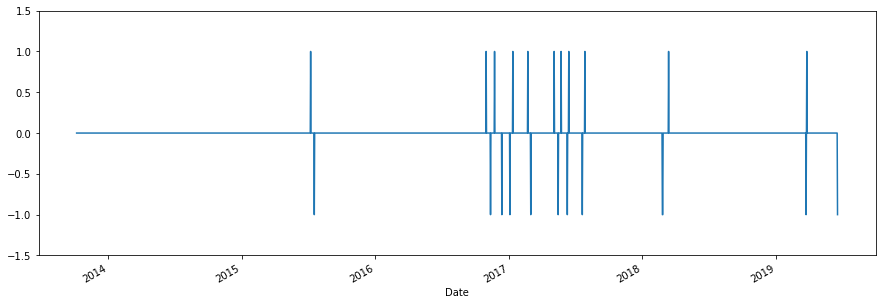

In [43]:
df8["Signal"].plot(ylim = (-1.5, 1.5))

In [44]:
df8["Signal"].value_counts()

 0.0    2047
-1.0      12
 1.0      11
Name: Signal, dtype: int64

In [45]:
df8.loc[df8["Signal"] == 1, "Close"]

Date
2015-07-09       0.006297
2016-10-31       0.018228
2016-11-23       0.295386
2017-01-12       0.035997
2017-02-22       0.037213
2017-05-05       0.051411
2017-05-24       0.070765
2017-06-14       0.078891
2017-07-28       0.095116
2018-03-14       2.576029
2019-03-27    3235.759341
Name: Close, dtype: float64

In [46]:
df8.loc[df8["Signal"] == -1, "Close"]

Date
2015-07-19       0.006225
2016-11-12       0.023471
2016-12-13       0.025715
2017-01-04       0.032850
2017-03-02       0.037961
2017-05-16       0.057597
2017-06-10       0.072222
2017-07-21       0.081085
2018-02-25       2.324093
2018-02-26       2.175606
2019-03-25    3303.972741
2019-06-19    7039.244838
Name: Close, dtype: float64

In [47]:
# Create a DataFrame with trades, including the price at the trade and the regime under which the trade is made.
df8_signals = pd.concat([
        pd.DataFrame({"Price": df8.loc[df8["Signal"] == 1, "Close"],
                     "Regime": df8.loc[df8["Signal"] == 1, "Regime"],
                     "Signal": "Buy"}),
        pd.DataFrame({"Price": df8.loc[df8["Signal"] == -1, "Close"],
                     "Regime": df8.loc[df8["Signal"] == -1, "Regime"],
                     "Signal": "Sell"}),
    ])
df8_signals.sort_index(inplace = True)
df8_signals

,Price,Regime,Signal
Date,,,
2015-07-09,0.006297,1,Buy
2015-07-19,0.006225,0,Sell
2016-10-31,0.018228,1,Buy
2016-11-12,0.023471,0,Sell
2016-11-23,0.295386,1,Buy
2016-12-13,0.025715,0,Sell
2017-01-04,0.032850,-1,Sell
2017-01-12,0.035997,0,Buy
2017-02-22,0.037213,1,Buy


In [48]:
# Let's see the profitability of long trades
df8_long_profits = pd.DataFrame({
        "Price": df8_signals.loc[(df8_signals["Signal"] == "Buy") &
                                  df8_signals["Regime"] == 1, "Price"],
        "Profit": pd.Series(df8_signals["Price"] - df8_signals["Price"].shift(1)).loc[
            df8_signals.loc[(df8_signals["Signal"].shift(1) == "Buy") & (df8_signals["Regime"].shift(1) == 1)].index
        ].tolist(),
        "End Date": df8_signals["Price"].loc[
            df8_signals.loc[(df8_signals["Signal"].shift(1) == "Buy") & (df8_signals["Regime"].shift(1) == 1)].index
        ].index
    })
df8_long_profits

,Price,Profit,End Date
Date,,,
2015-07-09,0.006297,-0.000072,2015-07-19
2016-10-31,0.018228,0.005243,2016-11-12
2016-11-23,0.295386,-0.269671,2016-12-13
2017-02-22,0.037213,0.000748,2017-03-02
2017-05-05,0.051411,0.006186,2017-05-16
2017-05-24,0.070765,0.001457,2017-06-10
2017-06-14,0.078891,0.002195,2017-07-21
2017-07-28,0.095116,2.228977,2018-02-25
2018-03-14,2.576029,3301.396712,2019-03-25


In [49]:
# We need to get the low of the price during each trade.
tradeperiods = pd.DataFrame({"Start": df8_long_profits.index,
                            "End": df8_long_profits["End Date"]})
df8_long_profits["Low"] = tradeperiods.apply(lambda x: min(df8.loc[x["Start"]:x["End"], "Low"]), axis = 1)
df8_long_profits

,Price,Profit,End Date,Low
Date,,,,
2015-07-09,0.006297,-0.000072,2015-07-19,0.005555
2016-10-31,0.018228,0.005243,2016-11-12,0.012126
2016-11-23,0.295386,-0.269671,2016-12-13,0.016162
2017-02-22,0.037213,0.000748,2017-03-02,0.028926
2017-05-05,0.051411,0.006186,2017-05-16,0.036670
2017-05-24,0.070765,0.001457,2017-06-10,0.002155
2017-06-14,0.078891,0.002195,2017-07-21,0.000010
2017-07-28,0.095116,2.228977,2018-02-25,0.000096
2018-03-14,2.576029,3301.396712,2019-03-25,0.000084


In [50]:
# Now we have all the information needed to simulate this strategy in apple_adj_long_profits
cash = 1000
df8_backtest = pd.DataFrame({"Start Port. Value": [],
                         "End Port. Value": [],
                         "End Date": [],
                         "Shares": [],
                         "Share Price": [],
                         "Trade Value": [],
                         "Profit per Share": [],
                         "Total Profit": [],
                         "Stop-Loss Triggered": []})
port_value = .1  # Max proportion of portfolio bet on any trade
batch = 10      # Number of shares bought per batch
stoploss = .2    # % of trade loss that would trigger a stoploss
for index, row in df8_long_profits.iterrows():
    batches = np.floor(cash * port_value) // np.ceil(batch * row["Price"]) # Maximum number of batches of stocks invested in
    trade_val = batches * batch * row["Price"] # How much money is put on the line with each trade
    if row["Low"] < (1 - stoploss) * row["Price"]:   # Account for the stop-loss
        share_profit = np.round((1 - stoploss) * row["Price"], 2)
        stop_trig = True
    else:
        share_profit = row["Profit"]
        stop_trig = False
    profit = share_profit * batches * batch # Compute profits
    # Add a row to the backtest data frame containing the results of the trade
    df8_backtest = df8_backtest.append(pd.DataFrame({
                "Start Port. Value": cash,
                "End Port. Value": cash + profit,
                "End Date": row["End Date"],
                "Shares": batch * batches,
                "Share Price": row["Price"],
                "Trade Value": trade_val,
                "Profit per Share": share_profit,
                "Total Profit": profit,
                "Stop-Loss Triggered": stop_trig
            }, index = [index]))
    cash = max(0, cash + profit)

In [51]:
df8_backtest

,Start Port. Value,End Port. Value,End Date,Shares,Share Price,Trade Value,Profit per Share,Total Profit,Stop-Loss Triggered
2015-07-09,1000.000000,999.927991,2015-07-19,1000.0,0.006297,6.296938,-0.000072,-0.072009,0.0
2016-10-31,999.927991,1009.827991,2016-11-12,990.0,0.018228,18.045936,0.010000,9.900000,1.0
2016-11-23,1009.827991,1089.027991,2016-12-13,330.0,0.295386,97.477254,0.240000,79.200000,1.0
2017-02-22,1089.027991,1121.427991,2017-03-02,1080.0,0.037213,40.189884,0.030000,32.400000,1.0
2017-05-05,1121.427991,1166.227991,2017-05-16,1120.0,0.051411,57.580319,0.040000,44.800000,1.0
2017-05-24,1166.227991,1235.827991,2017-06-10,1160.0,0.070765,82.087453,0.060000,69.600000,1.0
2017-06-14,1235.827991,1309.627991,2017-07-21,1230.0,0.078891,97.035693,0.060000,73.800000,1.0
2017-07-28,1309.627991,1413.627991,2018-02-25,1300.0,0.095116,123.651088,0.080000,104.000000,1.0
2018-03-14,1413.627991,1516.627991,2019-03-25,50.0,2.576029,128.801443,2.060000,103.000000,1.0
2019-03-27,1516.627991,1516.627991,2019-06-19,0.0,3235.759341,0.000000,2588.610000,0.000000,1.0


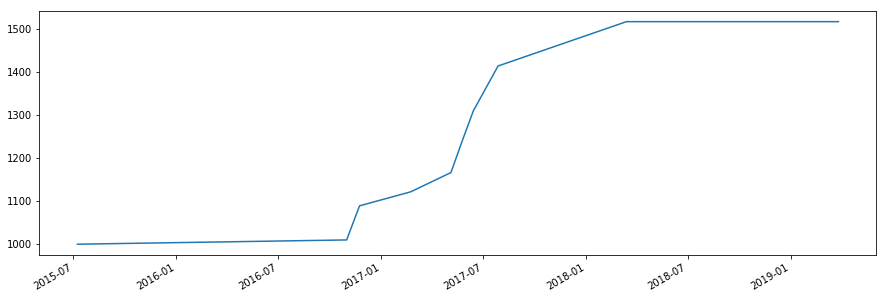

In [52]:
df8_backtest["End Port. Value"].plot()